In [1]:
pip install -Uqq fastai duckduckgo_search

Note: you may need to restart the kernel to use updated packages.


In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=1000):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('overwatch dva', max_images=1)
urls[0]

Searching for 'overwatch dva'


/home/syrym/.local/lib/python3.10/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


'http://hdqwalls.com/wallpapers/dva-overwatch-artwork-lu.jpg'

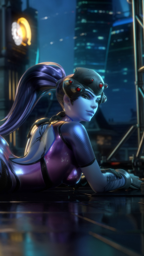

In [8]:
from fastdownload import download_url
dest = 'overwatch_dva.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'overwatch dva'


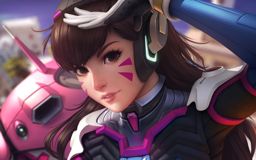

In [9]:
download_url(search_images('overwatch dva', max_images=1)[0], 'overwatch_dva.jpg', show_progress=False)
Image.open('overwatch_dva.jpg').to_thumb(256,256)

In [10]:
searches = 'tracer','reaper', 'widowmaker', 'pharah',
'reinhardt', 'mercy', 'torbjorn', 'hanzo',
'winston', 'zenyatta', 'bastion', 'symmetra',
'zarya', 'cassidy', 'soldier: 76', 'lucio',
'roadhog', 'junkrat', 'd.va', 'mei',
'genji', 'ana', 'sombra', 'orisa',
'doomfist', 'moira', 'wrecking ball', 'ashe',
'baptiste', 'sigma', 'echo', 'sojourn',
' junker queen', 'kiriko', 'ramattra', 'lifeweaver',
'illari', 'mauga'
path = Path('overwatch_characters')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'overwatch {o}'))
    sleep(1)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'overwatch tracer'
Searching for 'overwatch reaper'
Searching for 'overwatch widowmaker'


/usr/lib/python3/dist-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'overwatch pharah'


In [13]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

32

/home/syrym/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


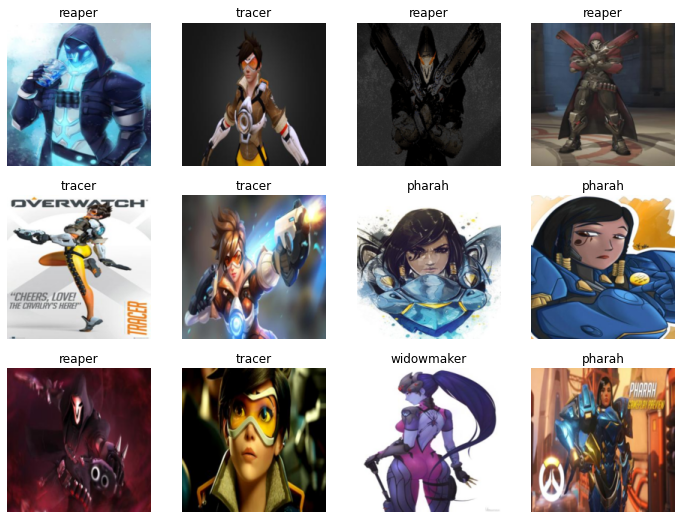

In [14]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [15]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Searching for 'overwatch widowmaker'


This is a: widowmaker.
Probability it's a widowmaker: 0.0000


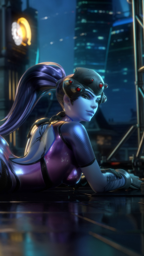

In [16]:
urls = search_images('overwatch widowmaker', max_images=1)
urls[0]

from fastdownload import download_url
dest = 'overwatch_widowmaker.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

character,_,probs = learn.predict(PILImage.create('overwatch_widowmaker.jpg'))
print(f"This is a: {character}.")
print(f"Probability it's a widowmaker: {probs[0]:.4f}")
Image.open(dest).to_thumb(256,256)

In [17]:
learn.export()

In [18]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [19]:
learn_inf = load_learner(path/'export.pkl')

In [20]:
learn_inf.predict('overwatch_widowmaker.jpg')

/home/syrym/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


('widowmaker',
 tensor(3),
 tensor([1.4119e-05, 5.9464e-07, 6.7303e-06, 9.9998e-01]))

In [21]:
learn_inf.dls.vocab

['pharah', 'reaper', 'tracer', 'widowmaker']

In [22]:
#hide_output
import ipywidgets as widgets
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value=(), description='Upload')

In [24]:
btn_upload = SimpleNamespace(data = ['overwatch_widowmaker.jpg'])

In [25]:
img = PILImage.create(btn_upload.data[-1])

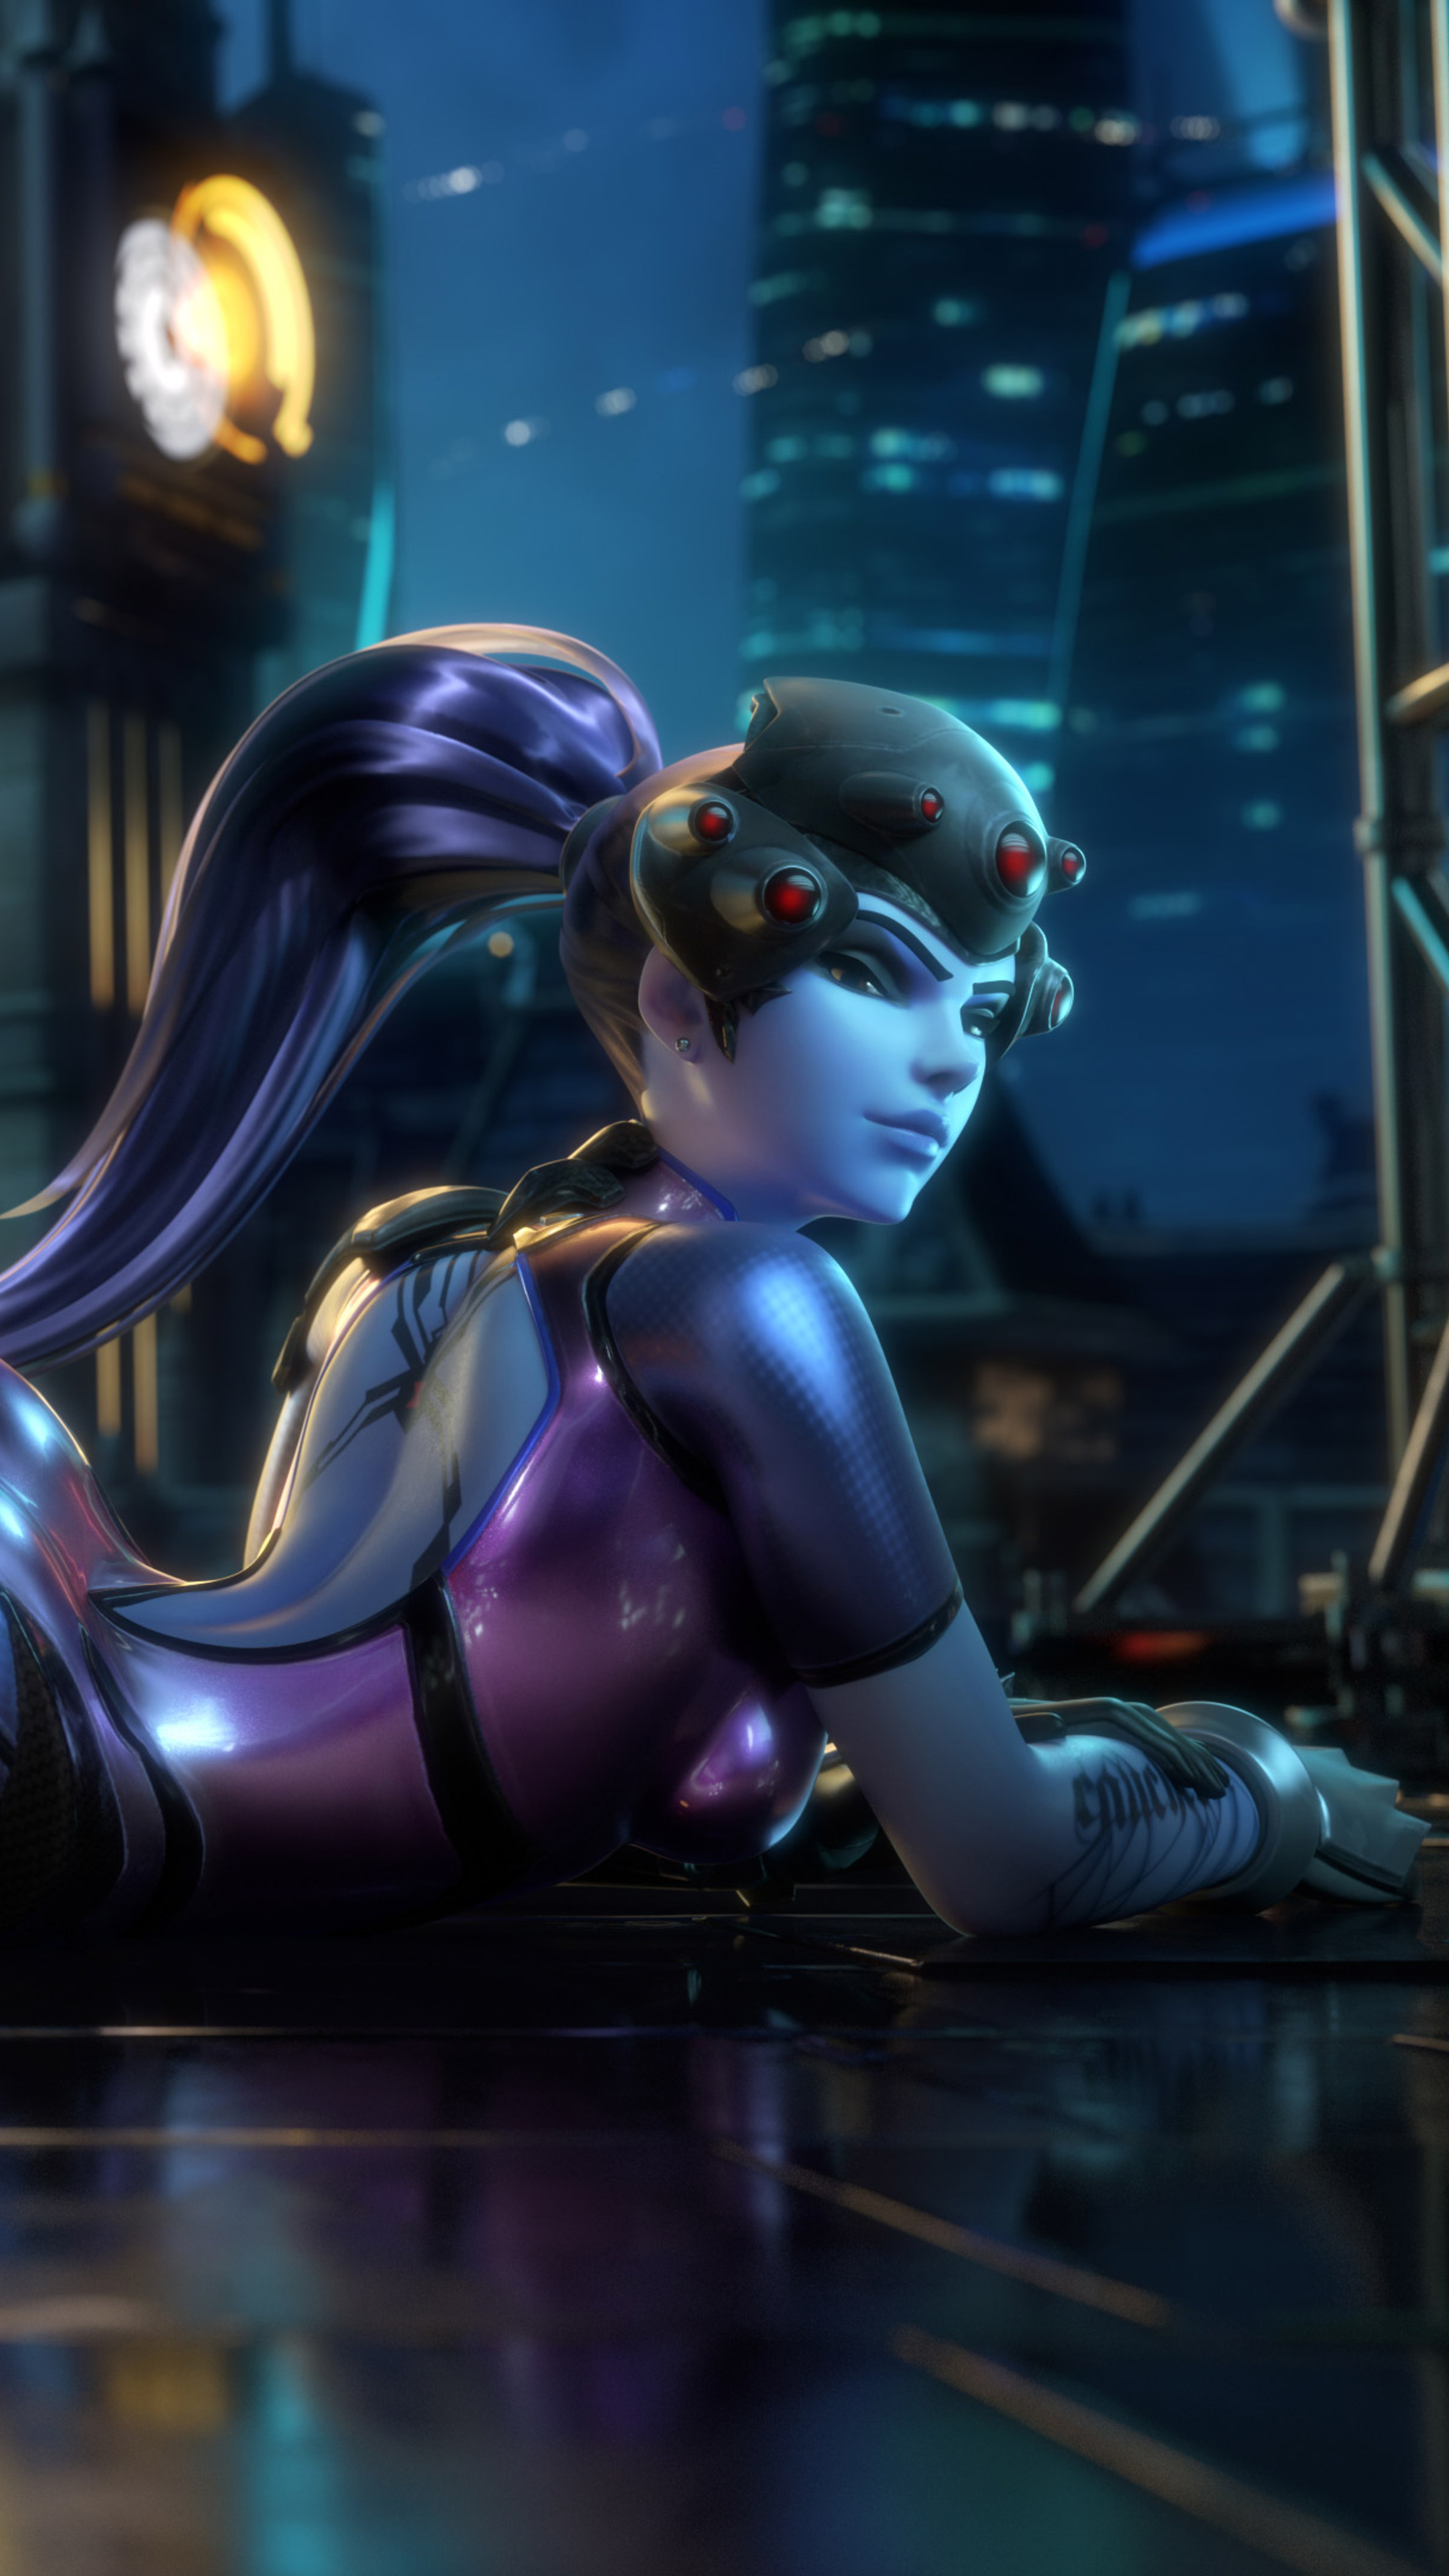

In [26]:
img

In [27]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl  

Output()

In [28]:
pred,pred_idx,probs = learn_inf.predict(img)

In [29]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: widowmaker; Probability: 1.0000')

In [30]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [31]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify) 

In [33]:
btn_upload = widgets.FileUpload()

In [36]:
from ipywidgets import Button, HBox, VBox

VBox([widgets.Label('Select your Overwatch character!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

AttributeError: 'FileUpload' object has no attribute 'data'

In [39]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 19.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.2/380.2 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.4/435.4 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 8.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-lo